# Visualization in matplotlib using the data in your eatery 


* using Python and either pscopg2 or sqlalchemy connect to the data in the database
* reuse your config file to make this connection / session
* bring in some database data and use that as the basis for your chart or graph
    * for example, use some of the queries in the questions above
* a bar chart would work for number of eateries grouped by permit start date year
… or a bar chart comparing the eateries per borough

In [1]:
import psycopg2
from db import * 
import os 
import json
import matplotlib.pyplot as plt
curpath=os.getcwd()

with open(curpath+'/config.json') as config_file:
    data = json.load(config_file)
    id= data['username']
    pw = data['password']
    db= data['database']
    
conn = psycopg2.connect(dbname=db, user=id, password=pw)
cur = conn.cursor()
q='SELECT extract(year from start_date) AS year , count(*) from eatery GROUP BY year ORDER BY year asc;'
cur.execute(q)
year=[]
count=[]
for row in cur:
    year.append(str(row[0]))
    count.append(row[1])




# Count of eateries per year based on permit start date

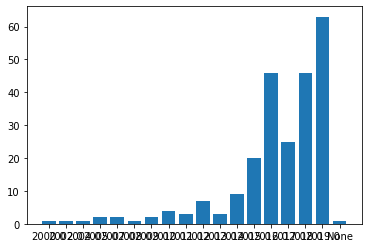

In [2]:
plt.bar(year, count)
plt.show()

# Which eateries are a cart, and which eateries aren't a cart?

In [3]:
q="SELECT tmp.name,count(tmp.name) FROM (SELECT e.eatery_id,CASE WHEN et.name ILIKE '%cart%' THEN 'Cart' ELSE et.name END, permit_number FROM eatery e INNER JOIN eatery_type et on et.eatery_type_id=e.eatery_type_id) tmp GROUP BY tmp.name ;"
cur.execute(q)
typeo= []
count= [ ]
for row in cur:
    typeo.append(str(row[0]))
    count.append(row[1])

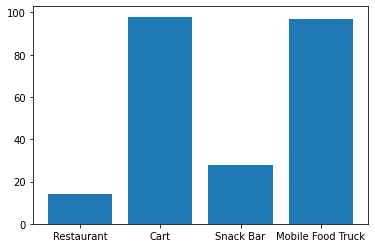

In [4]:
plt.bar(typeo, count)
plt.show()

# How many eateries are there per borough?

In [5]:
conn.commit()

In [6]:
cur = conn.cursor()
q="SELECT br.case as borough, count(*) from ( SELECT eatery_id, CASE WHEN park_id ilike '%X%' THEN 'Bronx' WHEN park_id ilike '%B%'  THEN  'Brooklyn'WHEN park_id ilike '%M%' THEN 'Manhattan' WHEN park_id ilike '%Q%'  THEN  'Queens' WHEN park_id ilike '%R%'  THEN  'Staten Island' END FROM eatery ) br GROUP BY br.case ;" 
cur.execute(q)
bor= []
count= [ ]
for row in cur:
    bor.append(str(row[0]))
    count.append(row[1])




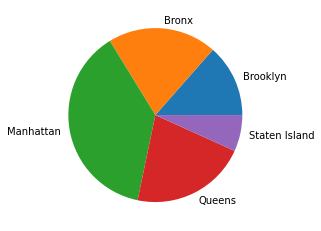

In [7]:
plt.pie(count, labels = bor)
plt.show() 